In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('pandas/data/train.csv', index_col='PassengerId')
test = pd.read_csv('pandas/data/test.csv', index_col='PassengerId')

train.head()  #앞 부분~ 기본은 5개
#, index_col = 'PassengerId'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 기본 정보
survived: 생존은 1, 사망은 0

Pclass : 1등석은 1, 2등석은 2, 3등석은 3으로 표시

Sibsp: siblings/spouses(형제,배우자)

Parch : parents/children(부모님, 자녀)


ticket: 티켓 일련번호
cabin : 선실 번호

embarked : C: Cherbourg, Q: Queenstown, S: Southampton(선착장)

In [3]:
train.shape  #shape()크기

(891, 11)

In [4]:
#결측치 확인(1)
#Age : 714개, Cabin  : 204개, Embarked : 889개

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#결측치 확인(2)

train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 결측치 처리하기

In [6]:
sex_mean = train.groupby('Sex')['Age'].mean()

#성별이 (여/남) 평균값 0/1번째에 넣어준다
train.loc[(train["Sex"] == 'female') & (train["Age"].isnull()), "Age"] = int(sex_mean[0])
train.loc[(train["Sex"] == 'male') & (train["Age"].isnull()), "Age"] = int(sex_mean[1])

train['Age'] = train['Age'].apply(lambda x:round(x))

train.head(40)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


#### Cabin(선실) 컬럼의 결측치

선실의 정보를 나타냄

In [7]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
#앞의 알파벳 추출하기
train['Cabin'] = train['Cabin'].fillna('N')  #결측치 N 
train['Cabin'] = train['Cabin'].apply(lambda x:x[0]) #해당 값은 0번째 값으로만 채움

train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,N,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,N,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,N,S


### Embarked(선착장)
결측치 2개

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].isnull().sum() #결측치 확인하기

2

In [47]:
train['Embarked'] = train['Embarked'].fillna('S') #결측치를 S로 변경

### 생존자, 사망자 인원수 출력하기

In [12]:
#0: 사망자, 1: 생존자
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#0 -> Dead, 1 -> Survived
train["Survived_label"] = train["Survived"].replace(0,"Dead").replace(1,"Survived")
train[['Survived','Survived_label']].head()

,Survived,Survived_label
PassengerId,,
1,0,Dead
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Dead


### 전체 생존율 구하기

생존율 = Survived/(Dead+Survived)*100

In [14]:
train['Survived_label'].value_counts()

Dead        549
Survived    342
Name: Survived_label, dtype: int64

In [15]:
temp = train['Survived_label'].value_counts()
survival_rate = temp[1]/(temp[0] + temp[1])*100

print(f"생존율은 {survival_rate:.1f}% 입니다.")

생존율은 38.4% 입니다.


### 생존자 시각화하기

<AxesSubplot:ylabel='Frequency'>

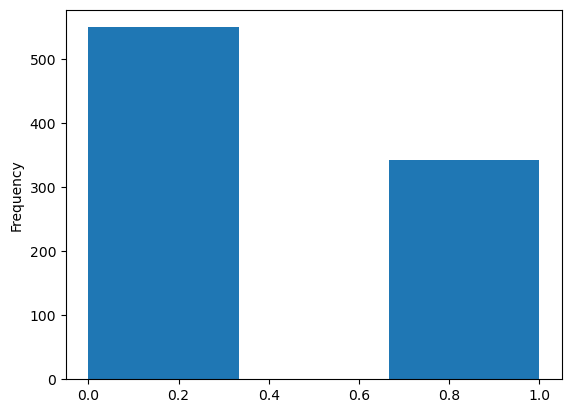

In [16]:
train['Survived'].plot(kind='hist', bins=3)

<AxesSubplot:>

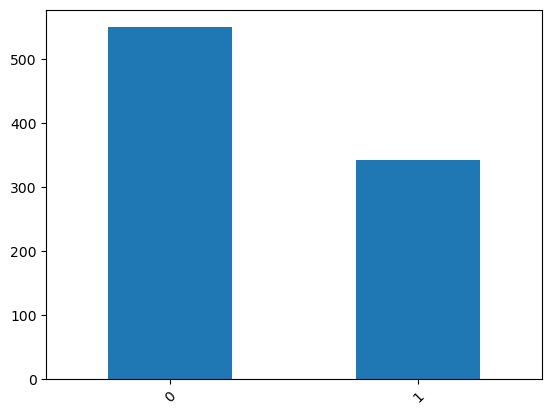

In [17]:
train['Survived'].value_counts().plot(kind='bar',rot='45')

<AxesSubplot:>

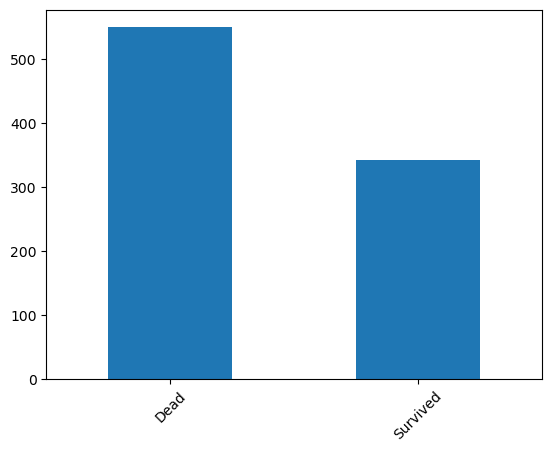

In [18]:
train['Survived_label'].value_counts().plot(kind='bar',rot='45')  #바 타입/45도

<AxesSubplot:ylabel='Survived'>

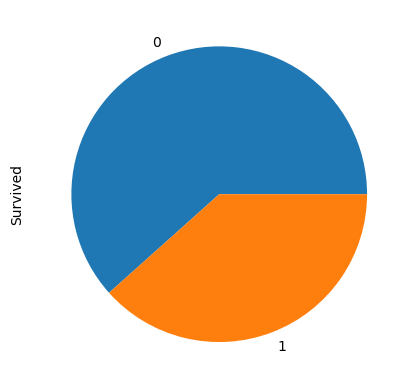

In [19]:
train['Survived'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Survived_label'>

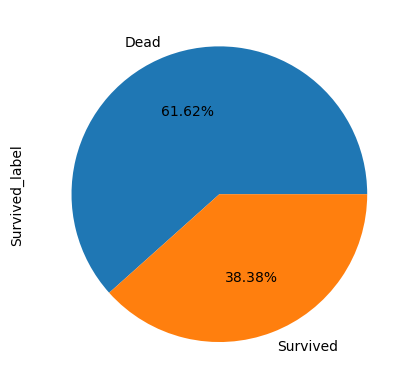

In [20]:
#수치 넣기
train['Survived_label'].value_counts().plot(kind='pie',autopct='%1.2f%%')  #소수점 둘째자리까지 출력

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


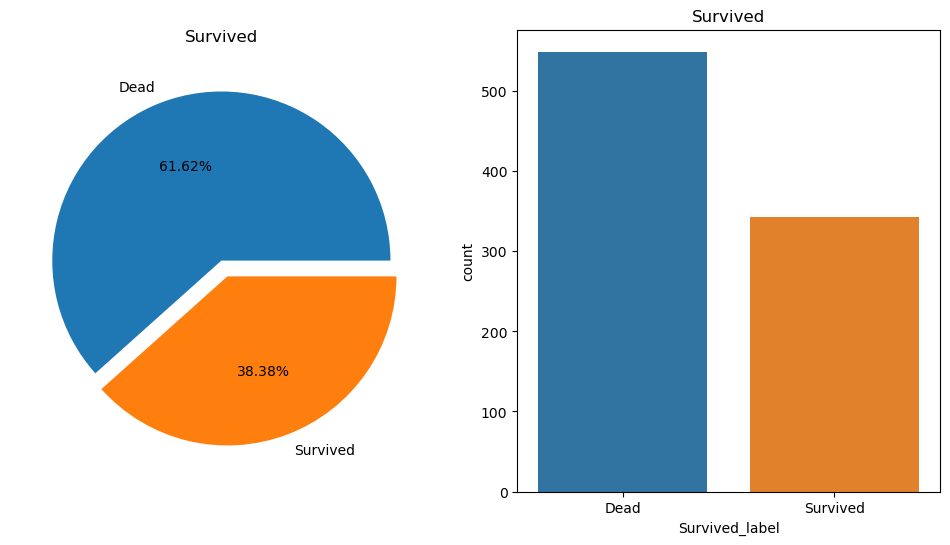

In [22]:
f,ax = plt.subplots(1,2,figsize=(12,6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 객실 데이터 정리 및 시각화하기(쉬운 그래프 채택)
1. First Class 2.Business 3.Economy

In [23]:
train['Pclass_label'] = train["Pclass"].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')

train[['Pclass','Pclass_label']].head()

,Pclass,Pclass_label
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


<AxesSubplot:ylabel='Pclass_label'>

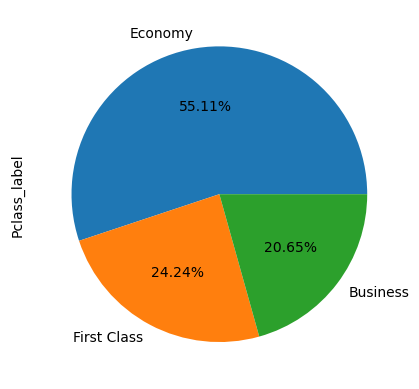

In [24]:
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<AxesSubplot:>

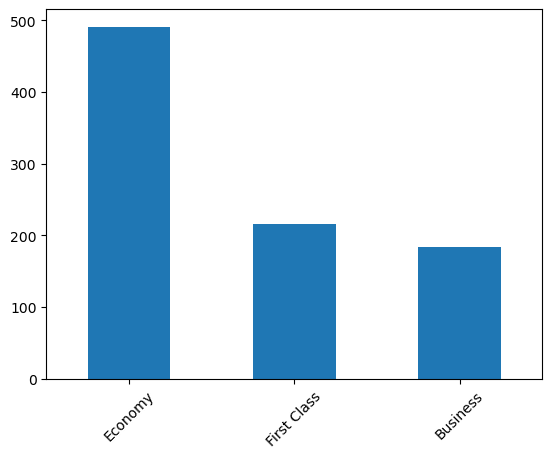

In [25]:
train['Pclass_label'].value_counts().plot(kind='bar', rot='45')

<AxesSubplot:xlabel='Pclass_label', ylabel='count'>

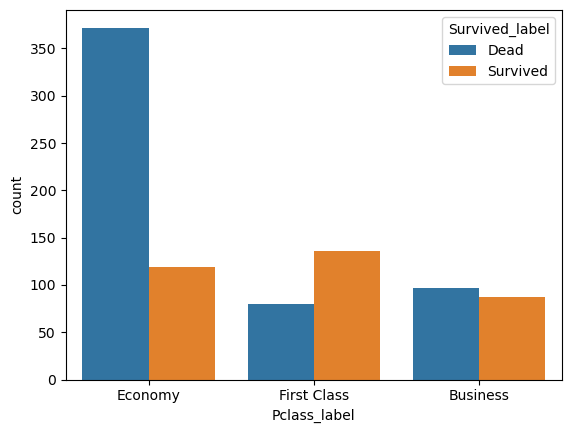

In [26]:
sns.countplot(data=train, x = "Pclass_label", hue="Survived_label")
#Economy석 사망자 많음
#First Class 상대적으로 생존자 많음

### 출발지 데이터 정리 및 시각화하기

In [27]:
#replace() 함수로 이름 변경
train['Embarked_label'] = train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

train[['Embarked','Embarked_label']].head()

,Embarked,Embarked_label
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


<AxesSubplot:xlabel='Embarked_label', ylabel='count'>

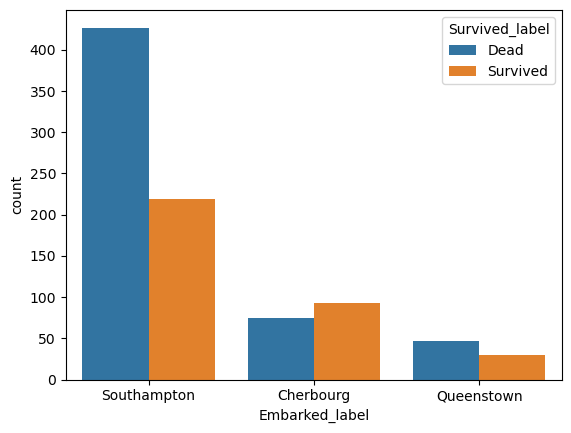

In [28]:
sns.countplot(data=train, x="Embarked_label", hue="Survived_label")

# 데이터 분석하기

### 가설세우기 1
(1) 타이타닉은 어떻게 침몰했는가?

타이타닉은 앞 부분이 먼저 추락했기 때문에 3등급 탑승객이 많이 사망했을 것이다.

In [29]:
#이름
train[['Name']].head(15)

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
6,"Moran, Mr. James"
7,"McCarthy, Mr. Timothy J"
8,"Palsson, Master. Gosta Leonard"
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


<AxesSubplot:xlabel='Sex', ylabel='count'>

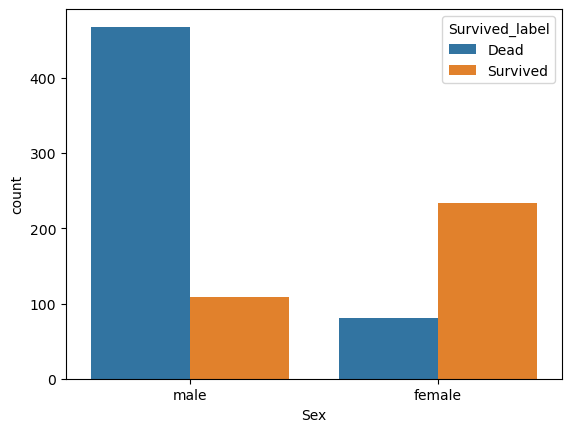

In [30]:
#성별
#여성이 훨씬 많이 살아남았다. 따라서 여성이 남성보다 살아남을 확률이 더 높다라는 가설을 세울 수 있다.

sns.countplot(data=train, x="Sex", hue="Survived_label")

<AxesSubplot:xlabel='Pclass_label', ylabel='count'>

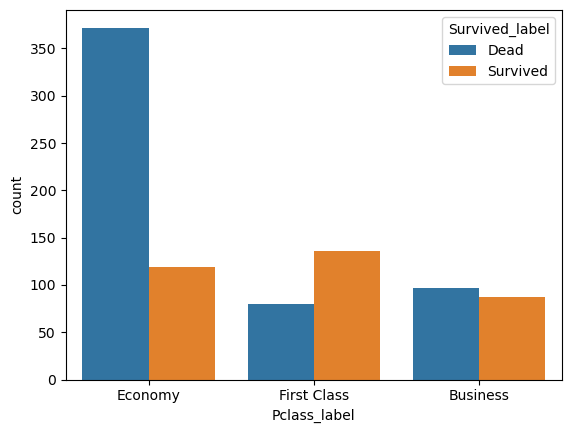

In [31]:
#객실
#First Class 승객이 살아남을 확률이 더 높았을까? 
sns.countplot(data=train, x = "Pclass_label", hue="Survived_label")


<AxesSubplot:xlabel='Cabin', ylabel='count'>

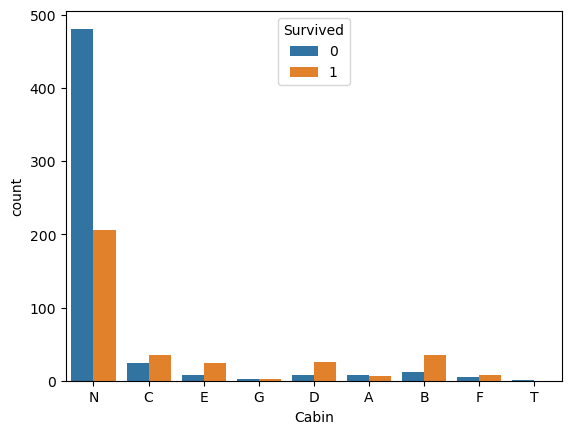

In [32]:
#cabin
sns.countplot(x='Cabin', hue='Survived', data=train)

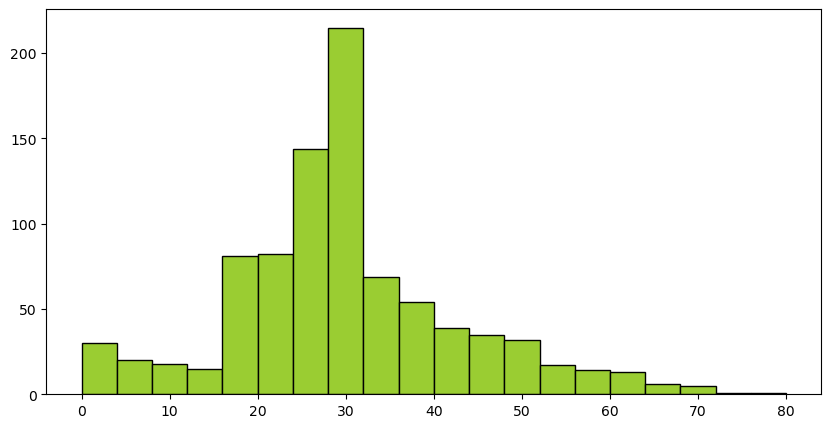

In [33]:
#나이 
train['Age'].hist(bins=20,figsize=(10,5), grid=False, edgecolor='black', color='yellowgreen');

<AxesSubplot:xlabel='Age', ylabel='count'>

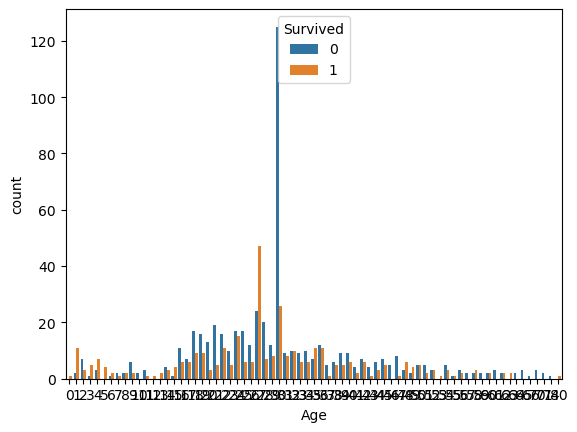

In [34]:
#청년들의 생존율
#청년이 더 많이 죽었을것이라고 예상됨
sns.countplot(x='Age', hue='Survived', data=train)

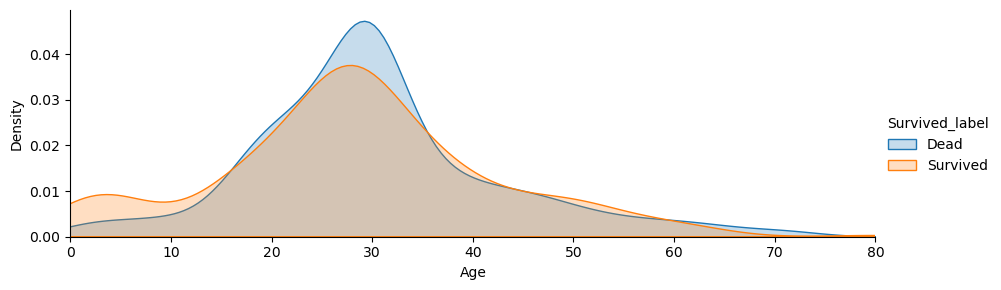

In [35]:
#커널 밀도 추정 그래프, KDE
#20대가 더 많이 죽음, 영화에서도 아이와 여성을 먼저 대피시킴
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)  #aspect: 밀도 조절
f.map(sns.kdeplot,'Age',shade=True)
f.set(xlim=(0,train['Age'].max()))
f.add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

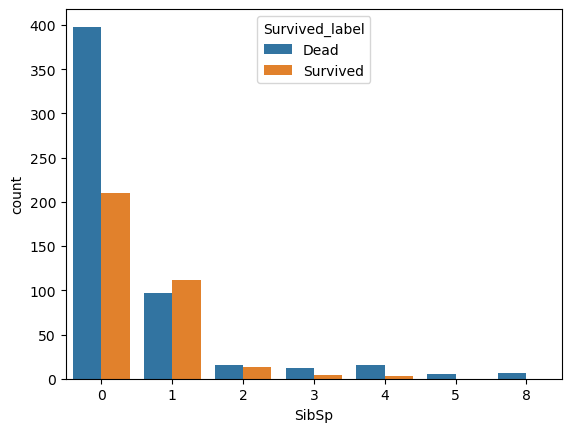

In [36]:
#형제, 배우자
#SibSP 탑승객과 함께 탄 배우자와 형제,자매 수를 의미함
#2명이상은 생존 가능성이 더 높음, 혼자탔을 경우 사망 가능성 높음
sns.countplot(data=train, x="SibSp", hue="Survived_label")

<AxesSubplot:xlabel='Parch', ylabel='count'>

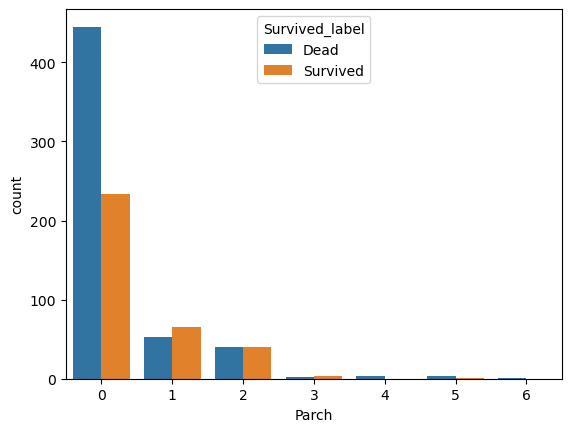

In [37]:
#부모, 자식
#Parch는 부모와 아이와 함께 탑승한 경우
#부모, 자녀가 2명 이상인 사람은 생존 가능성이 더 높다.
sns.countplot(data=train, x="Parch", hue="Survived_label")

### 가설 세우기2

In [38]:
#가족의 유무
#SibSp,Parch 둘다 없는 사람은 Single, 둘중 하나라도 있는 사람은 'Family'라고 저장함

train.loc[(train["SibSp"] == 0) & (train["Parch"] == 0), "Single"] = 'Single'
train.loc[(train["SibSp"] != 0) | (train["Parch"] != 0), "Single"] = 'Family'

train[["SibSp","Parch","Single"]].head(5)

,SibSp,Parch,Single
PassengerId,,,
1,1,0,Family
2,1,0,Family
3,0,0,Single
4,1,0,Family
5,0,0,Single


In [39]:
#생존률 확인
pd.pivot_table(data=train, index="Single", values="Survived")

,Survived
Single,
Family,0.505650
Single,0.303538


<AxesSubplot:xlabel='Single', ylabel='count'>

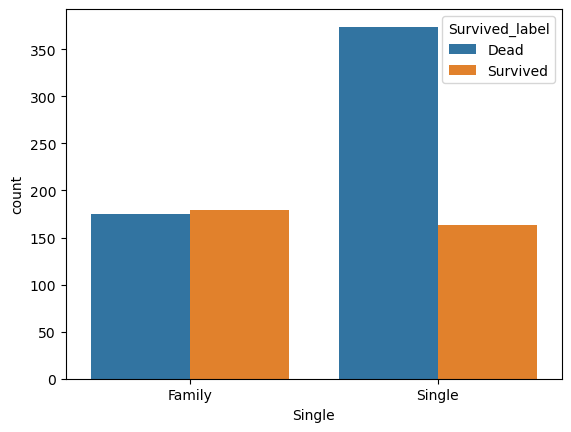

In [40]:
#가족이 없는 사람이 더 많이 사망하였음
sns.countplot(data=train, x="Single", hue="Survived_label")

In [41]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["SibSp", "Parch", "FamilySize"]]. head(10)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [42]:
#생존률 확인
pd.pivot_table(train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

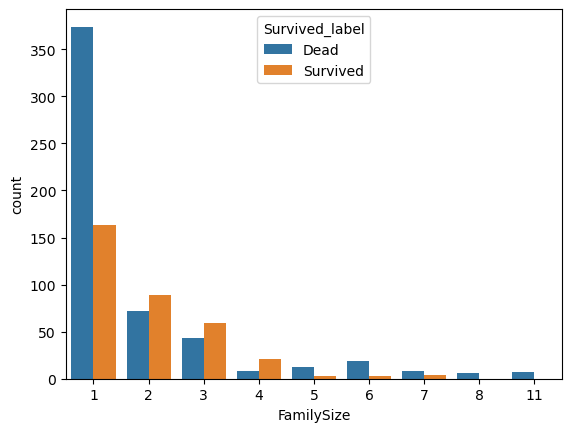

In [43]:
#혼자 있는 사람이 많이 죽었음
sns.countplot(data=train, x="FamilySize", hue="Survived_label")

#### FamilySize 컬럼 라벨링
1명: Single

2~4명:Nuclear

5명 이상:Big

In [44]:
train.loc[train["FamilySize"] ==1, "FamilySize_label"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilySize_label"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilySize_label"] = "Big"

train[["FamilySize", "FamilySize_label"]].head(10)

,FamilySize,FamilySize_label
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


<AxesSubplot:xlabel='FamilySize_label', ylabel='count'>

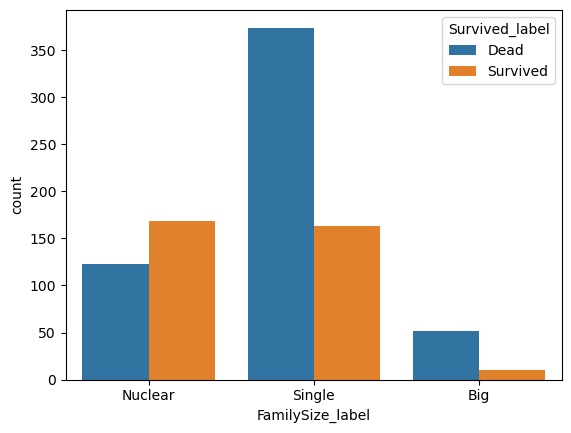

In [45]:
sns.countplot(data=train, x="FamilySize_label", hue="Survived_label")